# Pandas Tutorial

# Overview

### Within this notebook, we will cover:
#### 1: The basics of pandas and dataframes w/ CSV data
#### 2: Using pandas to work with CSV data
#### 3: Using Pandas groupby

#### Pandas is a library that makes it super easy to work with structured and large datasets. It has many built in features that make data analysis a breeze. 

#### Lets get some imports going!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### First, lets work with some basic CSV data

In [3]:
df = pd.read_csv('1950-2023_torn.csv')
df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71393,623328,2023,9,26,2023-09-26,15:05:00,3,FL,12,0,...,0.01,5,1,1,1,19,0,0,0,0
71394,623329,2023,9,28,2023-09-28,13:40:00,3,OH,39,0,...,0.01,25,1,1,1,97,0,0,0,0
71395,623330,2023,9,29,2023-09-29,18:48:00,3,MN,27,0,...,0.69,25,1,1,1,171,0,0,0,0
71396,623304,2023,9,2,2023-09-02,10:11:00,3,LA,22,0,...,0.69,75,1,1,1,51,0,0,0,0


### Great! Now what did that do?

### Basically, I utilized a built in function called pd.read_csv to turn a CSV file into a usable dataframe.
### What the heck is a data frame????

### A data frame is a two dimensional structure similar to a table that has rows and columns containing data. Those row and column numbers are like coordinates for the data in a sense.

### Lets go over how to uses these in the most basic way

### To view the first few rows of a dataset, you can do...

In [4]:
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


### This gives you a preview of the dataset and is useful for verifying the data loaded correctly

### We can also look at the back end of the dataset with...

In [7]:
df.tail()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
71393,623328,2023,9,26,2023-09-26,15:05:00,3,FL,12,0,...,0.01,5,1,1,1,19,0,0,0,0
71394,623329,2023,9,28,2023-09-28,13:40:00,3,OH,39,0,...,0.01,25,1,1,1,97,0,0,0,0
71395,623330,2023,9,29,2023-09-29,18:48:00,3,MN,27,0,...,0.69,25,1,1,1,171,0,0,0,0
71396,623304,2023,9,2,2023-09-02,10:11:00,3,LA,22,0,...,0.69,75,1,1,1,51,0,0,0,0
71397,623305,2023,9,9,2023-09-09,15:30:00,3,AZ,4,0,...,0.10,10,1,1,1,25,0,0,0,0


### To view your column names, you can do

In [8]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

### To see what the index of the df is, we can do...

In [10]:
df.index

RangeIndex(start=0, stop=71398, step=1)

### But that looks terrible so lets try and index it by the dates instead
### We notice that the 5th column (index 4) is the full dates in yyyy-mm-dd form, lets use that instead!

In [15]:
df = pd.read_csv('1950-2023_torn.csv', index_col=4, parse_dates=True)

In [19]:
df

,om,yr,mo,dy,time,tz,st,stf,stn,mag,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
date,,,,,,,,,,,,,,,,,,,,,
1950-10-01,192,1950,10,1,21:00:00,3,OK,40,23,1,...,15.80,10,1,1,1,25,0,0,0,0
1950-10-09,193,1950,10,9,02:15:00,3,NC,37,9,3,...,2.00,880,1,1,1,47,0,0,0,0
1950-11-20,195,1950,11,20,02:20:00,3,KY,21,1,2,...,0.10,10,1,1,1,177,0,0,0,0
1950-11-20,196,1950,11,20,04:00:00,3,KY,21,2,1,...,0.10,10,1,1,1,209,0,0,0,0
1950-11-20,197,1950,11,20,07:30:00,3,MS,28,14,1,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,623328,2023,9,26,15:05:00,3,FL,12,0,0,...,0.01,5,1,1,1,19,0,0,0,0
2023-09-28,623329,2023,9,28,13:40:00,3,OH,39,0,0,...,0.01,25,1,1,1,97,0,0,0,0
2023-09-29,623330,2023,9,29,18:48:00,3,MN,27,0,0,...,0.69,25,1,1,1,171,0,0,0,0


### Looks a bit easier to read, doesnt it? Now we indexed by dates instead of whatever om means.

### Also, do we notice the large amount of columns in here that provide data we cant interpert easily? Lets see if we can't drop those columns

In [41]:
df_clean = df.drop(columns=['stf','stn','ns','sn','sg','f1','f2','f3','f4'])

In [42]:
df_clean

,om,yr,mo,dy,time,tz,st,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
date,,,,,,,,,,,,,,,,,,,
1950-10-01,192,1950,10,1,21:00:00,3,OK,1,0,0,4.0,0.0,36.7300,-102.5200,36.8800,-102.3000,15.80,10,0
1950-10-09,193,1950,10,9,02:15:00,3,NC,3,3,0,5.0,0.0,34.1700,-78.6000,0.0000,0.0000,2.00,880,0
1950-11-20,195,1950,11,20,02:20:00,3,KY,2,0,0,5.0,0.0,37.3700,-87.2000,0.0000,0.0000,0.10,10,0
1950-11-20,196,1950,11,20,04:00:00,3,KY,1,0,0,5.0,0.0,38.2000,-84.5000,0.0000,0.0000,0.10,10,0
1950-11-20,197,1950,11,20,07:30:00,3,MS,1,3,0,4.0,0.0,32.4200,-89.1300,0.0000,0.0000,2.00,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,623328,2023,9,26,15:05:00,3,FL,0,0,0,0.0,0.0,29.9900,-81.6600,29.9900,-81.6600,0.01,5,0
2023-09-28,623329,2023,9,28,13:40:00,3,OH,0,0,0,1000.0,0.0,40.0632,-83.2430,40.0632,-83.2420,0.01,25,0
2023-09-29,623330,2023,9,29,18:48:00,3,MN,0,0,0,0.0,0.0,45.1051,-93.8302,45.1123,-93.8205,0.69,25,0


### Look at that... WAYYY easier to work with now that we don't have all these extra columns with data we dont plan to use.

### Now lets get some basic statistics for this dataset

In [43]:
df_clean.describe()

,om,yr,mo,dy,tz,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
count,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,7.139800e+04,7.139800e+04,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000,71398.000000
mean,123921.574162,1992.500140,5.945713,15.938752,3.000924,0.657862,1.575506,0.103014,1.364478e+05,1.019767e+03,37.071663,-92.520471,23.436161,-57.939103,3.649528,113.051248,0.026107
std,235622.304082,19.876577,2.457315,8.770595,0.071003,1.481439,19.993546,1.604690,8.964946e+06,6.969851e+04,5.314359,9.531765,18.421392,45.020078,8.604926,216.507171,0.159455
min,1.000000,1950.000000,1.000000,1.000000,0.000000,-9.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-163.530000,0.000000,-163.530000,0.000000,0.000000,0.000000
25%,289.000000,1976.000000,4.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,33.190550,-98.330000,0.000000,-94.816525,0.160000,20.000000,0.000000
50%,602.000000,1995.000000,6.000000,16.000000,3.000000,1.000000,0.000000,0.000000,1.000000e-01,0.000000e+00,37.000000,-93.400000,32.830000,-85.220000,0.900000,50.000000,0.000000
75%,1212.000000,2009.000000,7.000000,24.000000,3.000000,1.000000,0.000000,0.000000,4.000000e+00,0.000000e+00,40.919500,-86.622375,38.800000,0.000000,3.500000,100.000000,0.000000
max,623401.000000,2023.000000,12.000000,31.000000,9.000000,5.000000,1740.000000,158.000000,1.550000e+09,1.225000e+07,61.020000,0.000000,61.020000,0.000000,234.700000,4576.000000,1.000000


### Had we picked a dataset with data more built for statistics, we'd get some good information

### Now we will work the data and start trying to group by certain things.

### Pandas has a function called groupby which allows you to group all of the entries that have a shared feature such as a date

### Lets start by trying to group the number of tornadoes by state.

In [73]:
mag = df_clean.groupby(['st']).size().reset_index(name='count')

### What does this do?? Basically, what im telling pandas to do is to find out how many enteries have each unique state abbreviation and group them together and enumerate them. So in the end, it prints out how many tornadoes each state has had over the entire dataset.

### Doing this returns a separate data frame with a row for each state and its count of tornadoes. 

### Lets expand and group the original dataset by mean number of tornadoes per year by state.

In [79]:
st_count = df_clean.groupby(['st', 'yr']).size().groupby('st').mean().reset_index(name='avg_tornadoes_per_year')


In [80]:
st_count

,st,avg_tornadoes_per_year
0,AK,1.333333
1,AL,35.405405
2,AR,27.972973
3,AZ,4.253731
4,CA,6.814286
5,CO,32.878378
6,CT,2.588235
7,DC,1.500000
8,DE,2.114286
9,FL,49.067568


### Isnt that an ugly oneliner! But it works quite nicely. Basically what its doing is grouping by state and year to see how many tornadoes occurred each year in each state (which is also what the .size() does), and then grouping by state again and taking the mean, returninig a dataset containing the mean of tornadoes per year in each state.

### Lets make an obnoxiously long barchart...

Text(0, 0.5, 'Average Tornadoes Per Year')

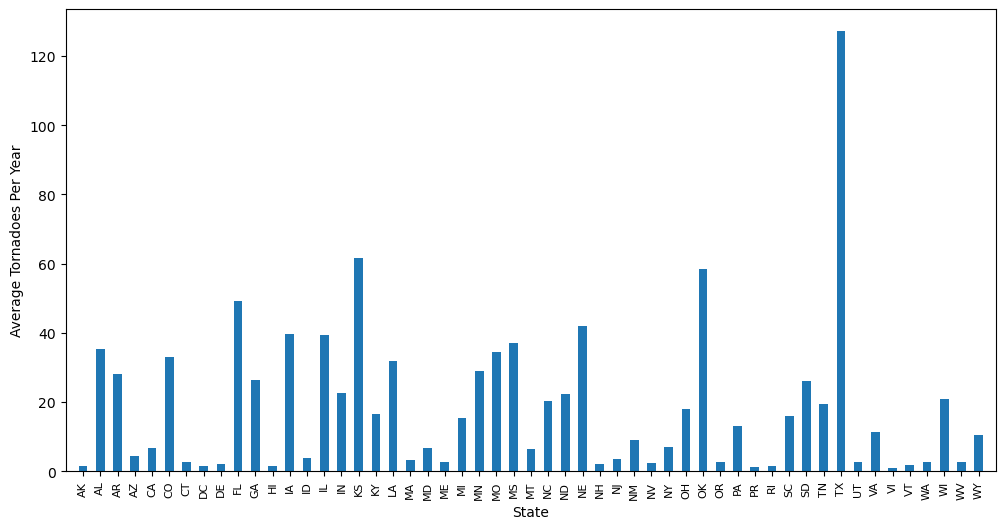

In [102]:
ax = st_count.plot.bar(x='st', figsize=(12, 6), legend=False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center',fontsize=8)
ax.set_xlim(-1, 53)
plt.xlabel('State')  
plt.ylabel('Average Tornadoes Per Year')  

### To close off, lets convert the df back to a CSV

In [108]:
st_count.to_csv('Avg_Tor_Per_State.csv')

### In this notebook we covered how to work with CSV data and manipulate the resulting dateframes with Pandas.

### Hopefully this notebook was informative!